# PROJECT: CIFAR10 Image Dataset Classification using Convolutional Neural Network

### Dataset description:
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Source: https://www.cs.toronto.edu/~kriz/cifar.html


# Import necessary libraries

In [23]:
# import python libraries
import numpy as np # for numerical computations
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn # for data visualization
import sklearn # use for machine learning
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import keras # use for building neural networks
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# magic command to display matplotlib plots inside jupyter notebook cells
%matplotlib inline 


# Load the dataset

In [2]:
# load the CIFAR-10 dataset and split it into training and test sets.
# x_train, y_train: training images and their corresponding labels
# x_test, y_test: test images and their corresponding labels

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# ---------------------
# verify that your data has been split correctly 
# into training and testing sets, and that the number 
# of samples in x matches the number of samples in y
# ---------------------

# check the shape of each array
print('x_train shape is:', x_train.shape)
print('x_test shape is:', x_test.shape)
print('y_train shape is:', y_train.shape)
print('y_test shape is:', y_test.shape)

x_train shape is: (50000, 32, 32, 3)
x_test shape is: (10000, 32, 32, 3)
y_train shape is: (50000, 1)
y_test shape is: (10000, 1)


# Data inspection & visualization

In [4]:
# define the class names of the dataset

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
          'frog', 'horse', 'ship', 'truck']

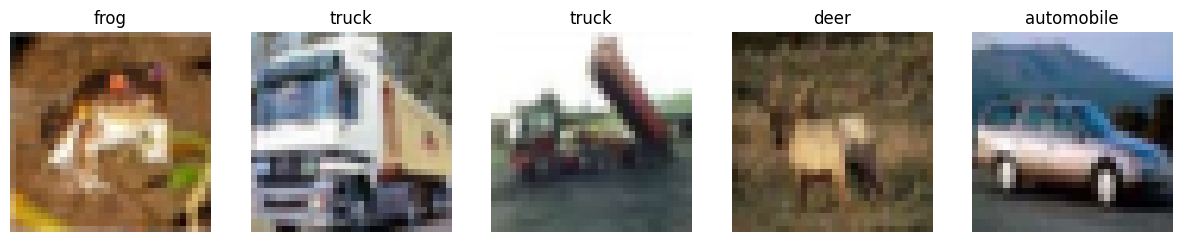

In [5]:
# ---------------------
# inspect the dataset to by plotting 
# a few training images with their corresponding labels
# this is to confirm images are loaded correctly,
# labels are correctly matched to images and
# the dataset makes sense before training a model
# ---------------------


# plot the first 5 images from the taining set

# create a figure with 1 row and 5 subplots 
# (side by side), and set the overall figure size to 15x3 inches
fig, axs = plt.subplots(1, 5, figsize = (15, 3))
for i in range (5):
    axs[i].imshow(x_train[i]) # display the i-th image in the subplot
    axs[i].set_title(class_names[y_train[i][0]]) # set the title of the subplot to the label of the image
    axs[i].axis('off') # remove axes for clarity
plt.show() # displays the figure with all 5 images and their titles
    

Text(0.5, 1.0, 'Class distribution in training set')

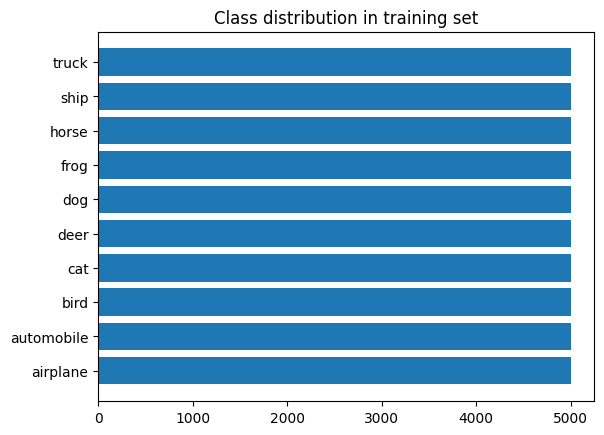

In [6]:
# check to see if the classes are equally distributed

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

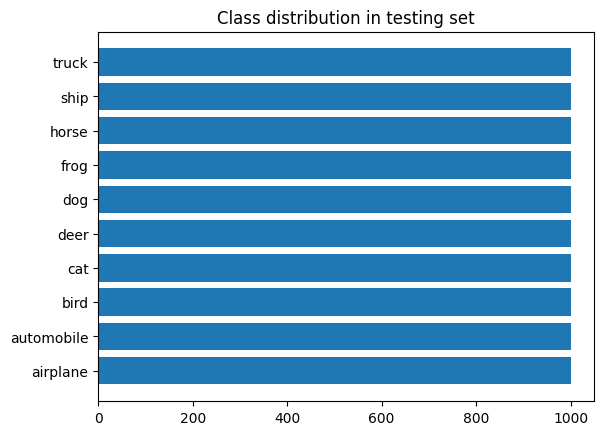

In [7]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

# Data Preprocessing

In [8]:
# before normalization
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
# ---------------------
# scale the data
# ---------------------

# Normalize the image data by scaling pixel values from 0-255 to 0-1
# This helps neural networks train faster and more effectively
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# Image Transformation for Data Augmentation

In [11]:
# ---------------------
# create a data generator that will make the 
# training images look different each time.
# This helps the model learn better and 
# not just "memorize" the training images
# ---------------------


train_datagen = ImageDataGenerator(
 rotation_range=20, # randomly rotate images up to 20 degrees
 width_shift_range=0.1, # randomly shift images horizontally up to 10% of the width
 height_shift_range=0.1, # randomly shift images vertically up to 10% of the height
 horizontal_flip=True, # randomly flip images horizontally
 vertical_flip=False, # Do NOT flip the image upside down
 shear_range=0.10, # slightly "slant" or "stretch" the image
 zoom_range=0.10 # randomly zoom in/out by up to 10%
 )

In [12]:
# Fit the transformation to the training dataset
train_datagen.fit(x_train)

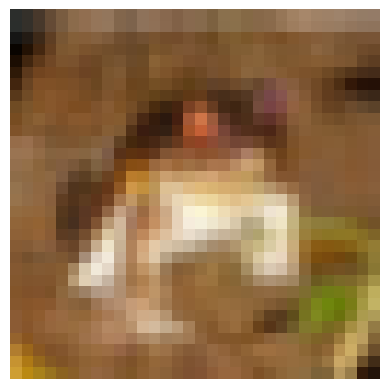

In [13]:
new_image = train_datagen.random_transform(x_train[0])
# Now use matplotlib to show this image.
plt.imshow(new_image, cmap = "gray")
# axes from the image.
plt.gca().axis("off")
# Show the figure.
plt.show()

# Build the CNN Model

In [14]:
# create a new sequential neural network model
# Sequential means the layers will be added one after another in order
model = Sequential()

model.add(Input(shape = (32,32,3)))

# 1st convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same'))

# 1st max pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# 2nd convolution layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

# 2nd max pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# 3rd convolution layer
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))

# 3rd max pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# flatten layer ( add it after the last pooling layer)
model.add(Flatten())

# 1st dense layer with 'relu'
model.add(Dense(64, activation = 'relu'))

# dropout rate (50%)
model.add(Dropout(0.5))

# 2nd dense layer with 'softmax'
model.add(Dense(10, activation = 'softmax'))

# print model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [15]:
model.compile(optimizer = SGD(learning_rate = 0.01, momentum = 0.9),
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train, 10), batch_size=32),
          epochs=20, validation_data=(x_test, keras.utils.to_categorical(y_test, 10)))



Epoch 1/20


C:\Users\JOEL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.2773 - loss: 1.9279 - val_accuracy: 0.4138 - val_loss: 1.5890
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4074 - loss: 1.6227 - val_accuracy: 0.4948 - val_loss: 1.4038
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4563 - loss: 1.5026 - val_accuracy: 0.5643 - val_loss: 1.2243
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4876 - loss: 1.4290 - val_accuracy: 0.5749 - val_loss: 1.2130
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5138 - loss: 1.3732 - val_accuracy: 0.6034 - val_loss: 1.1406
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5312 - loss: 1.3275 - val_accuracy: 0.6013 - val_loss: 1.1404
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5463 - loss: 1.2881 - val_accuracy: 0.6196 - val_loss: 1.0788
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5646 - loss: 1.25

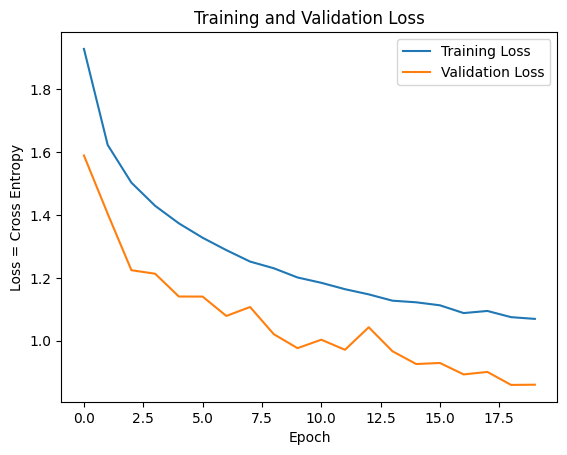

In [17]:
# check for overfitting
# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Cross Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

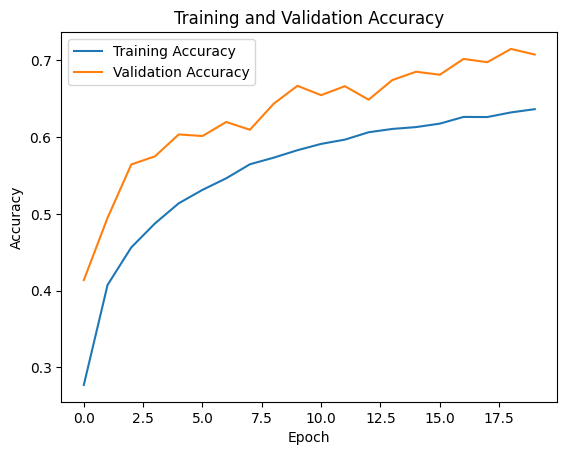

In [18]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

# Model prediction

In [21]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


# Visualize the results

In [24]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.86      0.84      0.85      1000
           2       0.72      0.46      0.56      1000
           3       0.58      0.42      0.49      1000
           4       0.62      0.72      0.67      1000
           5       0.61      0.64      0.63      1000
           6       0.70      0.81      0.75      1000
           7       0.74      0.77      0.75      1000
           8       0.87      0.76      0.81      1000
           9       0.73      0.84      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



<Figure size 2000x3200 with 0 Axes>

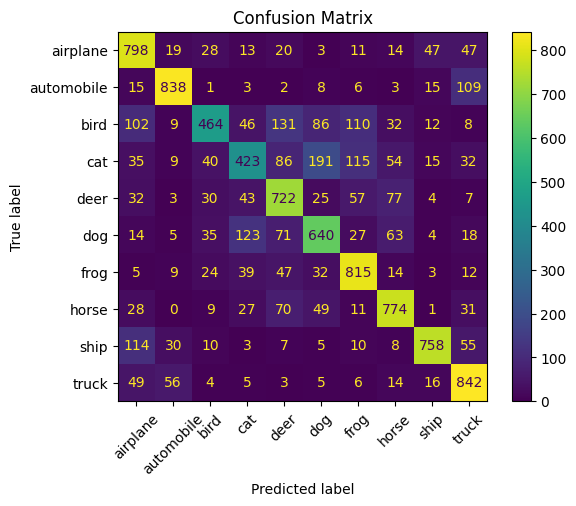

In [29]:
# print confusion matrix
plt.figure(dpi=200, figsize=(10,16))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=class_names)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()